<ipython-input-1-e64b0edfc041>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecast"] = forecast  # Apply same forecast to all test points


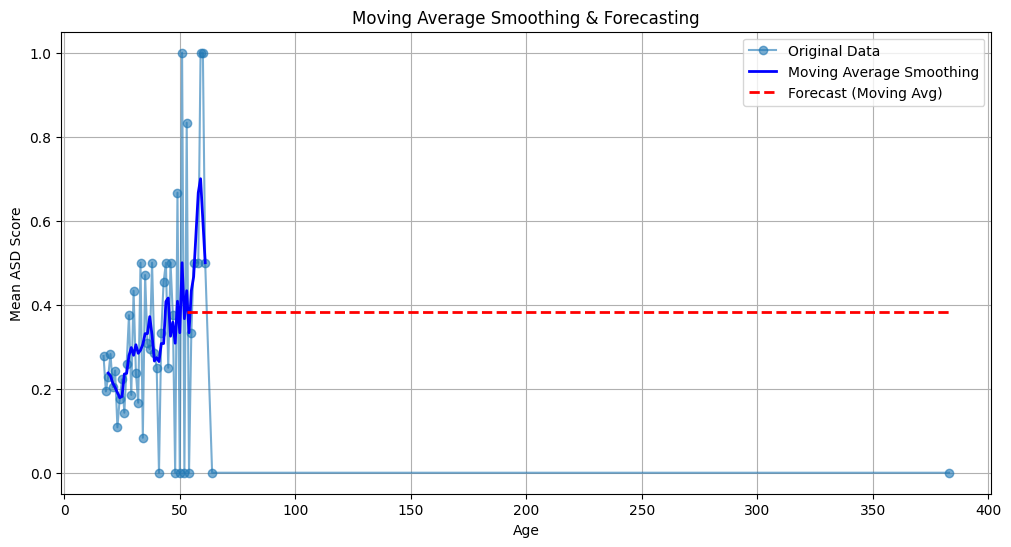

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (update the file path)
file_path = "/content/autism_screening.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove spaces
df.columns = df.columns.str.strip().str.lower()

# Ensure relevant columns exist
required_columns = {'age', 'class/asd'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset is missing required columns: {required_columns - set(df.columns)}")

# Convert 'class/asd' to numeric (YES = 1, NO = 0)
df["class/asd"] = df["class/asd"].map({"YES": 1, "NO": 0})

# Aggregate data by age (mean ASD classification score per age)
df_agg = df.groupby("age")["class/asd"].mean().reset_index()

# Sort by age
df_agg = df_agg.sort_values(by="age").dropna()

# Apply Moving Average Smoothing
window_size = 5  # Adjust window size as needed
df_agg["Moving_Avg"] = df_agg["class/asd"].rolling(window=window_size, center=True).mean()

# Split into train and test sets (80% train, 20% test)
split_idx = int(len(df_agg) * 0.8)
train = df_agg.iloc[:split_idx]
test = df_agg.iloc[split_idx:]

# Forecast using Moving Average (use last window_size values)
forecast = train["Moving_Avg"].iloc[-window_size:].mean()
test["Forecast"] = forecast  # Apply same forecast to all test points

# Plot the results
plt.figure(figsize=(12, 6))

# Original data
plt.plot(df_agg["age"], df_agg["class/asd"], marker="o", linestyle="-", alpha=0.6, label="Original Data")

# Moving Average Smoothed Data
plt.plot(df_agg["age"], df_agg["Moving_Avg"], color="blue", linewidth=2, label="Moving Average Smoothing")

# Forecasted values
plt.plot(test["age"], test["Forecast"], color="red", linestyle="--", linewidth=2, label="Forecast (Moving Avg)")

# Labels & legend
plt.xlabel("Age")
plt.ylabel("Mean ASD Score")
plt.title("Moving Average Smoothing & Forecasting")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
